In [1]:
import cv2
from PIL import Image
import numpy as np

In [16]:
image = cv2.imread('/Users/shravanprasanth/Documents/AIScouter/runs/detect/predict/crops/Robot/test5.jpg')

height, width, _ = image.shape
start_row = height // 2

bottom_half_img = image[start_row:height, :]
cv2.imwrite('bottom_half.jpg', bottom_half_img)
cv2.imshow('Bottom Half', bottom_half_img)

In [18]:
average_rgb = np.mean(bottom_half_img, axis=(0, 1))

print('Average RGB:', average_rgb)

Average RGB: [92.49963809 87.06264394 84.93406593]


In [21]:
!pip3 install levenshtein
!pip3 install easyocr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 17.6 MB/s eta 0:00:00a 0:00:01


In [19]:
import cv2
import numpy as np
from ultralytics import YOLO

# Load the YOLOv8 model (ensure your model is correctly trained for detecting robots)
model = YOLO('/Users/shravanprasanth/Documents/AIScouter/src/models/y8v7.pt')  # Replace with your custom model if applicable

# Open the input video
input_video_path = '/Users/shravanprasanth/Documents/AIScouter/src/videos/dcmp58.mp4'
cap = cv2.VideoCapture(input_video_path)

# Get video properties
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = cap.get(cv2.CAP_PROP_FPS)

# Define the codec and create a VideoWriter object to save the output video
output_video_path = '/Users/shravanprasanth/Documents/AIScouter/src/videos/output/dcmp58-colors.mp4'
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(output_video_path, fourcc, fps, (width, height))

# Process each frame
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Run YOLO detection on the frame
    results = model(frame)
    
    for result in results:
        boxes = result.boxes  # Get detected boxes

        for box in boxes:
            # Extract the bounding box coordinates
            x1, y1, x2, y2 = map(int, box.xyxy[0])

            # Crop the bottom half of the bounding box
            start_row = (y1 + y2) // 2
            bottom_half = frame[start_row:y2, x1:x2]

            # Calculate the average RGB values
            average_rgb = np.mean(bottom_half, axis=(0, 1))

            # Check the RGB condition for labeling
            label = 'Blue' if average_rgb[0] > average_rgb[-1] else 'Red'
            color = (255, 0, 0) if label == 'Blue' else (0, 0, 255)

            # Draw the bounding box and label on the frame
            cv2.rectangle(frame, (x1, y1), (x2, y2), color, 2)
            cv2.putText(frame, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, color, 2)

    # Write the processed frame to the output video
    out.write(frame)

# Release the video objects
cap.release()
out.release()

print("Processing complete. Output saved to", output_video_path)



0: 192x640 6 Robots, 72.0ms
Speed: 3.3ms preprocess, 72.0ms inference, 1.0ms postprocess per image at shape (1, 3, 192, 640)

0: 192x640 6 Robots, 67.7ms
Speed: 1.5ms preprocess, 67.7ms inference, 0.6ms postprocess per image at shape (1, 3, 192, 640)

0: 192x640 6 Robots, 90.7ms
Speed: 1.1ms preprocess, 90.7ms inference, 0.6ms postprocess per image at shape (1, 3, 192, 640)

0: 192x640 6 Robots, 56.9ms
Speed: 1.3ms preprocess, 56.9ms inference, 1.1ms postprocess per image at shape (1, 3, 192, 640)

0: 192x640 6 Robots, 53.7ms
Speed: 1.5ms preprocess, 53.7ms inference, 0.6ms postprocess per image at shape (1, 3, 192, 640)

0: 192x640 6 Robots, 64.3ms
Speed: 2.0ms preprocess, 64.3ms inference, 0.6ms postprocess per image at shape (1, 3, 192, 640)

0: 192x640 6 Robots, 61.2ms
Speed: 1.4ms preprocess, 61.2ms inference, 0.9ms postprocess per image at shape (1, 3, 192, 640)

0: 192x640 6 Robots, 54.9ms
Speed: 1.6ms preprocess, 54.9ms inference, 0.6ms postprocess per image at shape (1, 3, 19

In [22]:
import cv2
import numpy as np
from ultralytics import YOLO
import easyocr
from Levenshtein import distance as levenshtein_distance

# Load the YOLOv8 model (ensure your model is correctly trained for detecting robots)
model = YOLO('/Users/shravanprasanth/Documents/AIScouter/src/models/y8v7.pt')

# Initialize EasyOCR reader
reader = easyocr.Reader(['en'])

# Define the team numbers for red and blue teams
red_team_numbers = ["75", "2722", "1391"]  # Replace with actual red team numbers
blue_team_numbers = ["56", "5401", "8513"]  # Replace with actual blue team numbers

# Open the input video
input_video_path = '/Users/shravanprasanth/Documents/AIScouter/src/videos/dcmp58.mp4'
cap = cv2.VideoCapture(input_video_path)

# Get video properties
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = cap.get(cv2.CAP_PROP_FPS)

# Define the codec and create a VideoWriter object to save the output video
output_video_path = '/Users/shravanprasanth/Documents/AIScouter/src/videos/output/dcmp58-leven.mp4'
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(output_video_path, fourcc, fps, (width, height))

# Process each frame
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Run YOLO detection on the frame
    results = model(frame)
    
    for result in results:
        boxes = result.boxes  # Get detected boxes

        for box in boxes:
            # Extract the bounding box coordinates
            x1, y1, x2, y2 = map(int, box.xyxy[0])

            # Crop the bottom half of the bounding box
            start_row = (y1 + y2) // 2
            bottom_half = frame[start_row:y2, x1:x2]

            # Calculate the average RGB values
            average_rgb = np.mean(bottom_half, axis=(0, 1))

            # Determine the team color based on RGB values
            label = 'Blue' if average_rgb[0] > average_rgb[-1] else 'Red'
            color = (255, 0, 0) if label == 'Blue' else (0, 0, 255)

            # OCR: Recognize text in the bottom half of the box
            ocr_result = reader.readtext(bottom_half)
            detected_team_number = None

            if ocr_result:
                # Get the detected text
                detected_text = ocr_result[0][-2].replace(" ", "")  # Extract and clean text

                # Find the closest matching team number using Levenshtein distance
                if label == 'Red':
                    closest_match = min(red_team_numbers, key=lambda num: levenshtein_distance(detected_text, num))
                else:
                    closest_match = min(blue_team_numbers, key=lambda num: levenshtein_distance(detected_text, num))

                detected_team_number = closest_match

            # Draw the bounding box and label on the frame
            if detected_team_number:
                label += f" {detected_team_number}"
            cv2.rectangle(frame, (x1, y1), (x2, y2), color, 2)
            cv2.putText(frame, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, color, 2)

    # Write the processed frame to the output video
    out.write(frame)

# Release the video objects
cap.release()
out.release()

print("Processing complete. Output saved to", output_video_path)


Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete
0: 192x640 6 Robots, 54.4ms
Speed: 4.1ms preprocess, 54.4ms inference, 1.3ms postprocess per image at shape (1, 3, 192, 640)

0: 192x640 6 Robots, 45.5ms
Speed: 1.9ms preprocess, 45.5ms inference, 0.5ms postprocess per image at shape (1, 3, 192, 640)

0: 192x640 6 Robots, 45.7ms
Speed: 1.9ms preprocess, 45.7ms inference, 0.6ms postprocess per image at shape (1, 3, 192, 640)

0: 192x640 6 Robots, 47.0ms
Speed: 1.7ms preprocess, 47.0ms inference, 0.6ms postprocess per image at shape (1, 3, 192, 640)

0: 192x640 6 Robots, 45.7ms
Speed: 1.7ms preprocess, 45.7ms inference, 0.8ms postprocess per image at shape (1, 3, 192, 640)

0: 192x640 6 Robots, 43.9ms
Speed: 1.6ms preprocess, 43.9ms inference, 0.6ms postprocess per image at shape (1, 3, 192, 640)

0: 192x640 6 Robots, 43.9ms
Speed: 1.7ms preprocess, 43.9ms inference, 0.6ms postprocess per image at shape (1, 3, 192, 640)

0: 192x640 6 Robots, 44.9ms
Speed: 1.6m

: 

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.



0: 192x640 6 Robots, 94.7ms
Speed: 7.1ms preprocess, 94.7ms inference, 2.4ms postprocess per image at shape (1, 3, 192, 640)


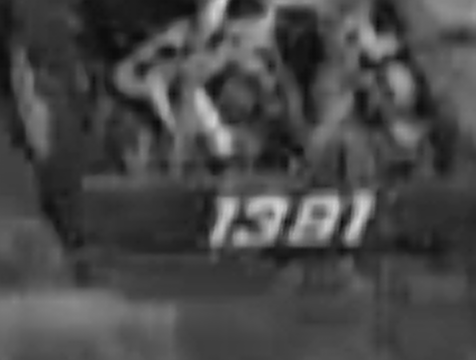

In [40]:
import cv2
import numpy as np
from ultralytics import YOLO
from PIL import Image
import easyocr
from Levenshtein import distance as levenshtein_distance
from difflib import SequenceMatcher
from rapidfuzz.distance import JaroWinkler

# Load the YOLOv8 model (ensure your model is correctly trained for detecting robots)
model = YOLO('/Users/shravanp/Coding/Robotics/AIScouter/src/models/y8v7.pt')

# Initialize EasyOCR reader
reader = easyocr.Reader(['en'])

# Define the team numbers for red and blue teams
red_team_numbers = ["75", "2722", "1391"]  # Replace with actual red team numbers
blue_team_numbers = ["56", "5401", "8513"]  # Replace with actual blue team numbers

# Provide the path to the input image
input_image_path = '/Users/shravanp/Coding/Robotics/AIScouter/src/images/test.png'
output_image_path = '/Users/shravanp/Coding/Robotics/AIScouter/src/images/output/test.png'

# Read the image
image = cv2.imread(input_image_path)

# Run YOLO detection on the image
results = model(image)
x = None
for result in results:
    boxes = result.boxes  # Get detected boxes

    for box in boxes:
        # Extract the bounding box coordinates
        x1, y1, x2, y2 = map(int, box.xyxy[0])

        # Crop the bottom half of the bounding box
        start_row = (y1 + y2) // 2
        bottom_half = image[start_row:y2, x1:x2]

        gray = cv2.cvtColor(bottom_half, cv2.COLOR_BGR2GRAY)

        # Apply GaussianBlur to reduce noise and improve OCR accuracy

        # # Apply thresholding to binarize the image
        # # _, thresh = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

        # # Apply morphological operations (optional, depends on image quality)
        # # kernel = np.ones((2, 2), np.uint8)
        # # morph = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)

        clahe = cv2.createCLAHE(clipLimit=1, tileGridSize=(10, 10))
        enhanced_gray = clahe.apply(gray)
        upscale_model = cv2.dnn_superres.DnnSuperResImpl_create()
        upscale_model.readModel('/Users/shravanp/Coding/Robotics/AIScouter/src/models/EDSR_x4.pb')  # Path to the pre-trained model
        upscale_model.setModel('espcn', 4)  # 'edsr' model with scale factor 4

        # Upscale the image
        upscaled_image = upscale_model.upsample(enhanced_gray)

        # Sharpen the image using an unsharp mask
        # gaussian_blur = cv2.GaussianBlur(enhanced_gray, (9, 9), 10.0)

        # Calculate the average RGB values
        average_rgb = np.mean(bottom_half, axis=(0, 1))

        # Determine the team color based on RGB values
        label = 'Blue' if average_rgb[0] > average_rgb[-1] else 'Red'
        color = (255, 0, 0) if label == 'Blue' else (0, 0, 255)

        # OCR: Recognize text in the bottom half of the box
        upscaled_img = cv2.resize(upscaled_image, None, fx=3, fy=3, interpolation=cv2.INTER_CUBIC)

        ocr_result = reader.readtext(upscaled_img)
        
        detected_team_number = None

        if ocr_result:
            # Get the detected text
            detected_text = ocr_result[0][-2].replace(" ", "")  # Extract and clean text

            # Find the closest matching team number using Levenshtein distance
            if label == 'Red':
                closest_match = max(red_team_numbers, key=lambda num: JaroWinkler.similarity(detected_text, num))
                if closest_match == "75":
                    x = Image.fromarray(upscaled_image)
                if closest_match in red_team_numbers:
                    red_team_numbers.remove(closest_match)
            else:
                closest_match = max(blue_team_numbers, key=lambda num: JaroWinkler.similarity(detected_text, num))
                if closest_match in blue_team_numbers:
                    blue_team_numbers.remove(closest_match)

            detected_team_number = closest_match


        # Draw the bounding box and label on the image
        if detected_team_number:
            label += f" {detected_team_number}"
        cv2.rectangle(image, (x1, y1), (x2, y2), color, 2)
        cv2.putText(image, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, color, 2)

# Save the processed image
cv2.imwrite(output_image_path, image)
x